# Probabilistic Models – Spring 2021
## Exercise Session 5
Feb 24th 16.15

<span style="color:red">**Carmen Diez**</span>

### Instructions
Make sure the notebook produces correct results when ran sequentially starting from the first cell. You can ensure this by clearing all outputs (`Edit > Clear All Outputs`), running all cells (`Run > Run All Cells`), and finally correcting any errors.

To get points:
1. Submit your answers to the automatically checked Moodle test. 
 - You have 5 tries on the test: the highest obtained score will be taken into account.
 - For numerical questions the tolerance is $1\cdot10^{-4}$.
2. Submit this notebook containing your derivations to Moodle.

Use the format specified in the week 2 exercises for returning the structure in Exercises 3, 4 and 6. 

### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.special import gammaln
import graphviz

## Exercise 1
***

Consider the following training data set $D$:


In [2]:
!cat data/1.train.tsv

X1	X2	X3	X4	Y
0	0	0	1	1
0	1	0	0	2
0	1	0	1	1
0	1	1	0	2
1	0	0	0	1
1	0	0	1	1
1	0	1	1	1
1	1	0	0	3
1	1	0	1	1
1	1	1	0	2


Consider  the  DAG  of  a  Naive  Bayes  classifier  structure  where $Y$ is the class. Learn parameters of the Bayesian network:

- (a) Using maximum likelihood estimation.
  - Report $P(X_3=1 \mid Y=1)$
- (b) Using the Bayesian Estimate with the BDeu prior using equivalent sample size of 1.
  - Report $P(X_4=1 \mid Y=2)$
- (c) Determine which estimate gives the higher likelihood (or log-likelihood) for the following test set.

In [3]:
!cat data/1.test.tsv

X1	X2	X3	X4	Y
0	0	0	0	1
0	0	1	0	2
0	0	1	1	1
0	1	1	1	2
1	0	1	0	3
1	1	1	1	2


### Solution

**(a)** MLE: $\theta_{ijk}=\frac{N_{ijk}}{N_{ij}}$

* $N_{ij}= \text{# of values where parents}(X_i)=Y=k$

* $N_{ijk}= \text{# of values where } X_i=j, \text{parents}(X_i)=Y=k$

**(b)** BE: $\theta_{ijk}=\frac{N_{ijk} + \alpha_{ijk}}{N_{ij} + \alpha_{ij}}$

* $\alpha_{ij} = \frac{\alpha}{q_i}$

* $\alpha_{ijk} = \frac{\alpha}{q_i r_i}$

* $q_i = \text{# of possible values of parents}(X_i)= Y$

* $r_i = \text{# of possible values of } X_i$

In [4]:
df = pd.read_csv('data/1.train.tsv', sep = '\t')

In [5]:
def Nijk(Xi, j, k, df):
    cond = df[df['Y']==k]
    Xijk = cond[cond[Xi]==j]
    return len(Xijk.index)

def Nij(k, df):
    cond = df[df['Y']==k]
    return len(cond.index)
    
def pCondMLE(Xi, j, k, df):
    return Nijk(Xi, j, k, df)/Nij(k, df)

def pCondBE(Xi, j, k, df):
    ri = len(df[Xi].value_counts().index)
    qi = len(df['Y'].value_counts().index)
    aijk = 1/(ri*qi)
    aij = 1/qi
    return (Nijk(Xi, j, k, df)+aijk)/(Nij(k, df)+aij)

In [6]:
print('(a) P(X3=1|Y=1)=', pCondMLE('X3', 1, 1, df))
print('(b) P(X4=1|Y=2)=', pCondBE('X4', 1, 2, df))

(a) P(X3=1|Y=1)= 0.16666666666666666
(b) P(X4=1|Y=2)= 0.049999999999999996


**(c)** The likelihood in both cases is calculated with the corresponding estimators:
$L(\theta:D)=P(D:\theta)=\prod_{ijk}\theta_{ijk}^{N_{ijk}}$.

With Maximum Likelihood Estimates some of the $\theta_{ijk}$ will be 0, so the likelihood will be 0. For Bayesian Estimates the probabilities will be more than 0 (thanks to the $\alpha$'s added). Thus, $0=$MLE likelihood $<$ BE likelihood.

## Exercise 2
***

Consider two binary variables $X$ and $Y$. Prove that the structures $X\rightarrow Y$ and $Y\rightarrow X$ have always the same BDeu score (regardless of data and hyperparameters). 

### Solution
* Data: 
    * $q_i=2=$\# of possible values parent
    * $r_i=2=$\# of possible values child
    * $\alpha_{ij}=\frac{\alpha}{q_i} = \frac{\alpha}{2}$
    * $\alpha_{ijk}=\frac{\alpha}{q_i*r_i} = \frac{\alpha}{4}$
    * $N_0=$\# of observations $X=0$ and $Y=0$.
    * $N_1=$\# of observations $X=0$ and $Y=1$.
    * $N_2=$\# of observations $X=1$ and $Y=0$.
    * $N_3=$\# of observations $X=1$ and $Y=1$.
    * 1 child ($n=1$) and 1 parent in both.
    * BDeu score: $\log(\prod_{j=1}^{q_i}(\frac{\Gamma(\alpha_{ij})}{\Gamma(N_{ij}+\alpha_{ij})} \prod_{k=1}^{r_i} \frac{\Gamma(N_{ijk}+\alpha_{ijk})}{\Gamma(\alpha_{ijk})}))
    = \log(\prod_{j=1}^{q_i}(\frac{\Gamma(\frac{\alpha}{2})}{\Gamma(N_{ij}+\frac{\alpha}{2})} \prod_{k=1}^{r_i} \frac{\Gamma(N_{ijk}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})}))$
    
    
* $X\rightarrow Y$
    * BDeu score:
$\log(
(\frac{\Gamma(\frac{\alpha}{2})}{\Gamma(N_{0}+N_{2}+\frac{\alpha}{2})} 
\frac{\Gamma(N_{0}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})}
\frac{\Gamma(N_{2}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})})
(\frac{\Gamma(\frac{\alpha}{2})}{\Gamma(N_{1}+N_{3}+\frac{\alpha}{2})} 
\frac{\Gamma(N_{1}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})}
\frac{\Gamma(N_{3}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})})
)$

$=
2\log\Gamma(\frac{\alpha}{2}) + \sum_{i=0}^3\log\Gamma(N_{i}+\frac{\alpha}{4})
- 4\log\Gamma(\frac{\alpha}{4}) - \log\Gamma(N_{0}+N_{2}+\frac{\alpha}{2}) - \log\Gamma(N_{1}+N_{3}+\frac{\alpha}{2})$

* $Y\rightarrow X$
    * BDeu score:
$\log(
(\frac{\Gamma(\frac{\alpha}{2})}{\Gamma(N_{0}+N_{1}+\frac{\alpha}{2})} 
\frac{\Gamma(N_{0}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})}
\frac{\Gamma(N_{1}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})})
(\frac{\Gamma(\frac{\alpha}{2})}{\Gamma(N_{2}+N_{3}+\frac{\alpha}{2})} 
\frac{\Gamma(N_{2}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})}
\frac{\Gamma(N_{3}+\frac{\alpha}{4})}{\Gamma(\frac{\alpha}{4})})
)$

$=
2\log\Gamma(\frac{\alpha}{2}) + \sum_{i=0}^3\log\Gamma(N_{i}+\frac{\alpha}{4})
- 4\log\Gamma(\frac{\alpha}{4}) - \log\Gamma(N_{0}+N_{1}+\frac{\alpha}{2}) - \log\Gamma(N_{2}+N_{3}+\frac{\alpha}{2})$

Equating both of them everything cancels out but:

$\log\Gamma(N_{0}+N_{1}+\frac{\alpha}{2}) + \log\Gamma(N_{2}+N_{3}+\frac{\alpha}{2})
=\log\Gamma(N_{0}+N_{2}+\frac{\alpha}{2}) + \log\Gamma(N_{1}+N_{3}+\frac{\alpha}{2})$

But both parts can be rewritten as:

$\log\Gamma(N_{0}+N_{1}+N_2+N_3+\alpha)$

$\square$

## Exercise 3
***

Consider three binary variables $X$, $Y$ and $Z$. We have observed 100 data vectors. Find a DAG that maximizes the marginal likelihood given BDeu priors with equivalent sample size 1. (Hint: BDeu score is likelihood equivalent, so it suffices to calculate the score for one member in each of the 11 eq. classes.)  Counts for different vectors are as follows:

In [7]:
!cat data/3.tsv

X	Y	Z	count
0	0	0	10
0	0	1	13
0	1	0	1
0	1	1	44
1	0	0	2
1	0	1	18
1	1	0	4
1	1	1	8


### Solution

BDeu score: $\sum_{i=1}^n \log(\prod_{j=1}^{q_i}(\frac{\Gamma(\alpha_{ij})}{\Gamma(N_{ij}+\alpha_{ij})} \prod_{k=1}^{r_i} \frac{\Gamma(N_{ijk}+\alpha_{ijk})}{\Gamma(\alpha_{ijk})}))$ 

$ =\sum_{i=1}^n \sum_{j=1}^{q_i}( \log\Gamma(\alpha_{ij}) + \log\Gamma(N_{i0k}+\alpha_{ijk}) + \log\Gamma(N_{i1k}+\alpha_{ijk}) - 2\log\Gamma(\alpha_{ijk}) - \log\Gamma(N_{ij}+\alpha_{ij}))$

* $N_{ij}= \text{# of values where parents}(X_i)=k$

* $N_{ijk}= \text{# of values where } X_i=j, \text{parents}(X_i)=k$

* $q_i = \text{# of possible values of parents}(X_i)$

* $r_i = \text{# of possible values of } X_i = 2$

* $\alpha = 1$

* $\alpha_{ij} = \frac{\alpha}{q_i} = \frac{1}{q_i}$

* $\alpha_{ijk} = \frac{\alpha}{q_i r_i} = \frac{1}{r_i*q_i}$

In [8]:
df = pd.read_csv('data/3.tsv', sep = '\t')

In [9]:
def calc(aij, aijk, Nij, Ni0k, Ni1k):
    plus = gammaln(aij) + gammaln(Ni0k + aijk) + gammaln(Ni1k + aijk)
    minus = gammaln(Nij + aij) + 2*gammaln(aijk)
    return plus-minus


def eachlog(Xi, pa, df):
    qi = 2**(len(pa))
    aijk = 1/(2*qi)
    aij = 1/qi
    
    if len(pa)==0:
        Ni0k = df[df[Xi]==0]['count'].sum()
        Ni1k = df[df[Xi]==1]['count'].sum()
        Nij = Ni0k + Ni1k
        res = calc(aij, aijk, Nij, Ni0k, Ni1k)
    elif len(pa)==1:
        res = 0
        for k in range(2):
            aux = df[df[pa[0]]==k]
            Ni0k = aux[aux[Xi]==0]['count'].sum()
            Ni1k = aux[aux[Xi]==1]['count'].sum()
            Nij = Ni0k + Ni1k
            res += calc(aij, aijk, Nij, Ni0k, Ni1k)
    elif len(pa)==2:
        res = 0
        for k1 in range(2):
            for k2 in range(2):
                aux = df[(df[pa[0]]==k1) & (df[pa[1]]==k2)]
                Ni0k = aux[aux[Xi]==0]['count'].sum()
                Ni1k = aux[aux[Xi]==1]['count'].sum()
                Nij = Ni0k + Ni1k
                res += calc(aij, aijk, Nij, Ni0k, Ni1k)
    return res

In [10]:
# Equivalence classes represented as dictionaries with nodes: parents
# For example, X->Y Z is equivalent to X<-Y Z (direction doesnt matter)
dags = [
    # v-structure
    {'X':['Y','Z'],'Y':[],'Z':[]}, #X middle
    {'X':[],'Y':['X','Z'],'Z':[]}, #Y middle
    {'X':[],'Y':[],'Z':['X','Y']}, #Z middle
    # just one edge
    {'X':['Y'],'Y':[],'Z':[]}, #X-Y
    {'X':[],'Y':[],'Z':['X']}, #X-Z
    {'X':[],'Y':['Z'],'Z':[]}, #Y-Z
    # two edges
    {'X':[],'Y':['X'],'Z':['Y']}, #X-Y-Z (rotating then...)
    {'X':['Z'],'Y':['X'],'Z':[]}, #Z-X-Y
    {'X':['Z'],'Y':[],'Z':['Y']}, #Y-Z-X
    # v-structure and one edge
    {'X':['Y','Z'],'Y':[],'Z':['Y']}, #X middle, Y-Z
    {'X':['Z'],'Y':['X','Z'],'Z':['Y']}, #Y middle, X-Z
    {'X':['Y'],'Y':[],'Z':['X','Y']}, #Z middle, X-Y
    # separated
    {'X':[],'Y':[],'Z':[]}]

maxi = -float("inf")
maxiDAG = []

for dag in dags:
    res = 0
    for n in ['X', 'Y', 'Z']:
        res += eachlog(n, dag[n], df)
    print(dag, res)
    if maxi<res:
        maxiDAG = dag
        maxi = res
        
print()
print('MAX:', maxiDAG, maxi)

{'X': ['Y', 'Z'], 'Y': [], 'Z': []} -180.59006127030915
{'X': [], 'Y': ['X', 'Z'], 'Z': []} -177.45071676536995
{'X': [], 'Y': [], 'Z': ['X', 'Y']} -180.818597889465
{'X': ['Y'], 'Y': [], 'Z': []} -183.29465521131485
{'X': [], 'Y': [], 'Z': ['X']} -186.6625363354099
{'X': [], 'Y': ['Z'], 'Z': []} -183.52319183047072
{'X': [], 'Y': ['X'], 'Z': ['Y']} -182.61659211655075
{'X': ['Z'], 'Y': ['X'], 'Z': []} -185.75593662148998
{'X': ['Z'], 'Y': [], 'Z': ['Y']} -185.98447324064583
{'X': ['Y', 'Z'], 'Y': [], 'Z': ['Y']} -179.91199817554508
{'X': ['Z'], 'Y': ['X', 'Z'], 'Z': ['Y']} -179.233935080781
{'X': ['Y'], 'Y': [], 'Z': ['X', 'Y']} -179.91199817554508
{'X': [], 'Y': [], 'Z': []} -184.20125492523476

MAX: {'X': [], 'Y': ['X', 'Z'], 'Z': []} -177.45071676536995


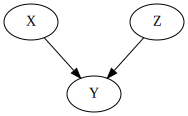

In [11]:
g = graphviz.Digraph(engine='dot', graph_attr={'rankdir':'TB', 'size':'20', 'nodesep':'1'})

g.node("X")
g.node("Y")
g.node("Z")

g.edge("X","Y")
g.edge("Z","Y")

g

In [12]:
# Function to concatenate matrix rows into a single string
def mat2vec(dag):
    return ''.join(str(x) for x in dag.values.reshape(dag.values.shape[0]**2))

# Adjacency matrix
rvs = ["X", "Y", "Z"]
DAG = pd.DataFrame(0, index=rvs, columns=rvs)

# Edges
DAG.loc["Y", ["X", "Z"]] = 1

# Create the vector
print(mat2vec(DAG))

000101000


## Exercise 4
***

Medical diagnosis. Let's have the following notation:

| Notation | A person has                        |
|----------|-------------------------------------|
| $A=1$    | brain cancer                        |
| $B=1$    | high blood calcium level            |
| $C=1$    | brain tumor                         |
| $D=1$    | seizures that cause unconsciousness |
| $E=1$    | person has severe headaches         |

An expert has told us the following information about the relationships between variables:

> (1) Probability of severe headaches $P(E = 1)$ depends only on the fact whether a person has a brain tumor ($C$) or not. (2) On the other hand, if one knows the blood calcium level ($B$) and whether the person has a tumor or not ($C$), one can specify the probability of unconsciousness seizures ($D$). (3) In this case, the probability of $D$ doesn't depend on the presence of the headaches ($E$) or (directly) on the fact whether the person has brain cancer or not  ($A$). (4) The probability of a brain tumor ($C$) depends directly only on the fact, whether the person has brain cancer or not ($A$).

Construct a DAG that represents the conditional independencies specified by the expert. (Hint: start with a full DAG with causal order A,B,C,D,E, and remove unnecessary edges.)

### Solution
**(1)** $E \perp \!\!\! \perp A,B,D|C$

**(2)** $D \perp \!\!\! \perp A|B,C$

**(4)** $C \perp \!\!\! \perp B|A$

Starting with a full DAG with causal order A,B,C,D,E and with the abover information remove unnecessary edges such that: child independent certain nodes given direct parent --> erase edge between certain nodes and child.
A.k.a. deleting A->D, A->E, B->E, B->C, D->E.

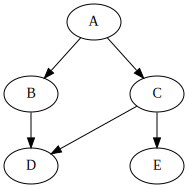

In [13]:
g = graphviz.Digraph(engine='dot', graph_attr={'rankdir':'TB', 'size':'20', 'nodesep':'1'})

g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")

g.edge("A","B")
g.edge("A","C")
g.edge("B","D")
g.edge("C","D")
g.edge("C","E")

g

In [14]:
# Function to concatenate matrix rows into a single string
def mat2vec(dag):
    return ''.join(str(x) for x in dag.values.reshape(dag.values.shape[0]**2))

# Adjacency matrix
rvs = ["A", "B", "C", "D", "E"]
DAG = pd.DataFrame(0, index=rvs, columns=rvs)

# Edges
DAG.loc["B", ["A"]] = 1
DAG.loc["C", ["A"]] = 1
DAG.loc["D", ["B", "C"]] = 1
DAG.loc["E", ["C"]] = 1

# Create the vector
print(mat2vec(DAG))

0000010000100000110000100


## Exercise 5
***

Given the data used in Exercise 3 and the structure $X \rightarrow Y \rightarrow Z$, find the Bayesian estimates (i.e. expected parameters) given BDeu priors with equivalent sample size 1.

- Report the expected parameter for $P(Z=1 \mid Y=0)$.

### Solution

BE: $\theta_{ijk}=\frac{N_{ijk} + \alpha_{ijk}}{N_{ij} + \alpha_{ij}}$

* $N_{ij}= \text{# of values where parents}(X_i)=k$

* $N_{ijk}= \text{# of values where } X_i=j, \text{parents}(X_i)=k$

* $q_i = \text{# of possible values of parents}(X_i) = 2$

* $r_i = \text{# of possible values of } X_i = 2$

* $\alpha = 1$

* $\alpha_{ij} = \frac{\alpha}{q_i} = \frac{1}{2}$

* $\alpha_{ijk} = \frac{\alpha}{q_i r_i} = \frac{1}{4}$

In [15]:
df = pd.read_csv('data/3.tsv', sep = '\t')

In [16]:
def pCondBE2(Xi, j, pa, k, df):
    aijk = 1/4
    aij = 1/2
    aux = df[df[pa]==k]
    Nij = aux.sum()['count']
    Nijk = aux[aux[Xi]==j].sum()['count']
    return (Nijk+aijk)/(Nij+aij)

print('P(Z=1|Y=0): ', pCondBE2('Z', 1, 'Y', 0, df))

P(Z=1|Y=0):  0.7183908045977011


## Exercise 6
***

A run of the PC-algorithm (i.e., IC-algorithm with a particular way of selecting the tests) does the following independence tests on a data set with 5 variables:

```
Conditioning set size=0;
x= 1  y= 2  S=  : pval = 0.3551245 
x= 1  y= 3  S=  : pval = 0 
x= 1  y= 4  S=  : pval = 0.2132192 
x= 1  y= 5  S=  : pval = 0.5073849 
x= 2  y= 3  S=  : pval = 7.690449e-49 
x= 2  y= 4  S=  : pval = 2.855907e-79 
x= 2  y= 5  S=  : pval = 0.565885 
x= 3  y= 1  S=  : pval = 0 
x= 3  y= 2  S=  : pval = 7.690449e-49 
x= 3  y= 4  S=  : pval = 0.09429652 
x= 3  y= 5  S=  : pval = 0.1341955 
x= 4  y= 2  S=  : pval = 2.855907e-79 
x= 4  y= 5  S=  : pval = 6.976787e-232 
x= 5  y= 4  S=  : pval = 6.976787e-232 
Conditioning set size=1;
x= 2  y= 3  S= 4 : pval = 1.250955e-42 
x= 2  y= 4  S= 3 : pval = 9.714191e-73 
x= 3  y= 1  S= 2 : pval = 0 
x= 3  y= 2  S= 1 : pval = 1.442632e-51 
x= 4  y= 2  S= 5 : pval = 5.618453e-124 
x= 4  y= 5  S= 2 : pval = 3.864918e-276
```

Here x and y denote the nodes and S is the conditioning set. The p-value threshold used is 0.01, so any tests where pval is less than 0.01 are considered to imply dependence, while p-values more than 0.01 are considered to imply independence. Which equivalence class of DAGs does the algorithm return? There may be several different solutions possible.

If the equivalence class allows some edge to be directed in either direction, encode it as 1 in both directions in the vector to be returned to Moodle.

### Solution 
**(1)** Take complete undirected graph.

**(2) Skeleton search** If a set $S_{AB}$ for $A$ and $B$ exists such that $A \perp \!\!\! \perp B | S_{AB}$ then remove edge $A$̣-$B$.
We remove all that are independent according to the test:

1-2, 1-4, 1-5, 2-5, 3-4 and 3-5. We get the skeleton **1-3-2-4-5**.

**(3) Orientation I** For each pair $A$ and $B$ of non-adjacent variables in the graph with a common neighbor $C$, check whether $C \in S_{AB}$. If not, then orient arcs $A$ -> $C$ and $B$ -> $C$ (v-structure):

Seeing the dependencies with a conditioning set of size 1 we have the following:
* **1 -> 3 <- 2**:
    * X=3, Y=1, S=2
    * X=3, Y=2, S=1
* **2 -> 4 <- 5**:
    * X=4, Y=5, S=2
    * X=4, Y=2, S=5
    
Thus, we get: **1 -> 3 <- 2 -> 4 <- 5**.

<span style="color:red">**ESTO INSTEAD: los nodos no estan en S = [] porque es el vacío y no hay nadie fiiin, te coges alguna de las parejas y tirar palante.**</span>

**(4) Orientation II** orient as many arcs $D$ -> $E$ as possible subject to one of the conditions:
* the orientation $E$ -> $D$ creates a new v-structure; or
* the orientation $E$ -> $D$ creates a directed cycle.

Everything is oriented already so no need to do anything.

In [17]:
# Adjacency matrix
rvs = ["1", "2", "3", "4", "5"]
DAG = pd.DataFrame(0, index=rvs, columns=rvs)

# Edges
DAG.loc["3", ["1"]] = 1
DAG.loc["3", ["2"]] = 1
DAG.loc["4", ["2"]] = 1
DAG.loc["4", ["5"]] = 1

# Create the vector
print(mat2vec(DAG))

0000000000110000100100000
